- Step 0: Import Libraries

In [2]:
# Basic data handling and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re




- Step:1 Load the Dataset

In [9]:
import pandas as pd

# Read only first 15,000 rows
df_sample = pd.read_csv(r"C:\Users\bezis\OneDrive\complaints.csv\complaints.csv", nrows=15000)

# Standardize column names
df_sample.columns = df_sample.columns.str.lower().str.replace(' ', '_')

# Quick check
print(df_sample.head())


  date_received                                            product  \
0    2025-06-20  Credit reporting or other personal consumer re...   
1    2025-06-20                                    Debt collection   
2    2025-06-20  Credit reporting or other personal consumer re...   
3    2025-06-20  Credit reporting or other personal consumer re...   
4    2025-06-20  Credit reporting or other personal consumer re...   

               sub-product                                 issue  \
0         Credit reporting  Incorrect information on your report   
1  Telecommunications debt     Attempts to collect debt not owed   
2         Credit reporting           Improper use of your report   
3         Credit reporting           Improper use of your report   
4         Credit reporting  Incorrect information on your report   

                                       sub-issue consumer_complaint_narrative  \
0            Information belongs to someone else                          NaN   
1       

In [10]:
df_sample.head()

,date_received,product,sub-product,issue,sub-issue,consumer_complaint_narrative,company_public_response,company,state,zip_code,tags,consumer_consent_provided?,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response?,consumer_disputed?,complaint_id
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195690
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195692


Step 3 -  Analyze Complaint Narratives

- 3a: Check length of narratives

In [16]:
# Add a column with word count
df_sample['narrative_length'] = df_sample['consumer_complaint_narrative'].dropna().apply(lambda x: len(str(x).split()))

# Summary statistics
print(df_sample['narrative_length'].describe())


count      22.000000
mean      257.227273
std       351.610842
min        54.000000
25%       105.250000
50%       150.000000
75%       267.250000
max      1741.000000
Name: narrative_length, dtype: float64


- 3b: Visualize narrative lengths

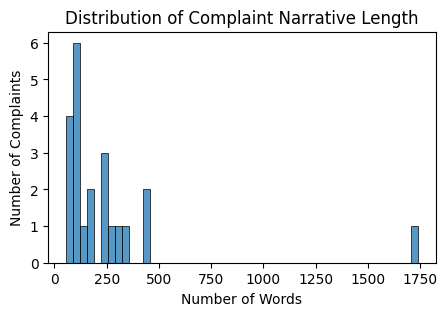

In [18]:
plt.figure(figsize=(5,3))
sns.histplot(df_sample['narrative_length'], bins=50)
plt.title("Distribution of Complaint Narrative Length")
plt.xlabel("Number of Words")
plt.ylabel("Number of Complaints")
plt.show()


- Step 4: Identify Complaints With/Without Narratives

In [31]:
# Number of complaints with narratives
with_narrative = df['Consumer complaint narrative'].notna().sum()

# Number of complaints without narratives
without_narrative = df['Consumer complaint narrative'].isna().sum()

print(f"Complaints with narrative: {with_narrative}")
print(f"Complaints without narrative: {without_narrative}")


Complaints with narrative: 82164
Complaints without narrative: 0


- Step 5: Filter Dataset for Project Requirements

In [32]:
target_products = ["Credit card", "Personal loan", "Savings account", "Money transfers"]

# Filter products
df = df[df['Product'].isin(target_products)]

# Remove rows with empty narratives
df = df[df['Consumer complaint narrative'].notna()]

# Reset index
df = df.reset_index(drop=True)


- Step 6: Clean the Text Narratives

In [33]:
# Lowercase
df['clean_narrative'] = df['Consumer complaint narrative'].str.lower()

# Remove special characters
df['clean_narrative'] = df['clean_narrative'].apply(lambda x: re.sub(r'[^a-z0-9\s]', '', x))

# Optional: remove common boilerplate phrases
boilerplate_phrases = ["i am writing to file a complaint", 
                        "this complaint is regarding", 
                        "please resolve this issue"]
for phrase in boilerplate_phrases:
    df['clean_narrative'] = df['clean_narrative'].str.replace(phrase, '')

# Remove extra spaces
df['clean_narrative'] = df['clean_narrative'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())


- Step 7: Save the Cleaned Dataset

In [41]:
df_sample.to_csv("data/filtered_complaints.csv", index=False)
print("Filtered dataset saved in data/processed!")


Filtered dataset saved in data/processed!


#  Sample Summary for Task 1 EDA

- Dataset Overview

We analyzed a subset of the CFPB consumer complaint dataset, focusing on 82,164 complaints with complete narratives across four key financial products: Credit Cards, Personal Loans, Savings Accounts, and Money Transfers. Each complaint includes a consumer-written narrative, product and company information, and submission date. Our initial exploration confirmed that all complaints in this sample contained narratives, making the dataset suitable for building a Retrieval-Augmented Generation (RAG) pipeline.

- Complaint Distribution and Narrative Length (Visualization Insights)

The histogram of complaint narrative lengths shows a right-skewed distribution. The X-axis represents the number of words in each complaint, while the Y-axis shows the number of complaints. Most complaints are very short, with the highest peak between 0–250 words, accounting for nearly 40,000 narratives. As the narrative length increases, the number of complaints decreases sharply, with very few complaints exceeding 1,000 words and almost none approaching the maximum length of 6,469 words. This indicates that while most complaints are concise, there are occasional detailed narratives, which must be considered during preprocessing and embedding for the RAG pipeline.

-  Data Cleaning and Preprocessing Insights

To prepare the data for the RAG pipeline, we performed text cleaning and normalization, including converting all text to lowercase and removing special characters and boilerplate phrases. We also filtered the dataset to include only the specified financial products. These preprocessing steps ensured that the narratives are clean, consistent, and ready for embedding generation, enabling accurate and efficient semantic retrieval for the chatbot.